In [76]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [77]:
df = pd.read_csv('customer_churn_dataset.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
1162,9359-UGBTK,Female,0,No,No,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),72.35,4991.5,No
4705,5760-FXFVO,Male,0,No,No,6,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,494.95,No
4539,4355-HBJHH,Male,0,Yes,Yes,67,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,79.70,5293.4,Yes
6819,3005-NFMTA,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.80,5617.75,Yes


In [78]:
df.drop(columns=['customerID'], inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**"TotalCharges" should be float (numeric) but here object so check it**

In [79]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(7043,), dtype=object)

In [80]:
# pd.to_numeric(df.TotalCharges)

''' 
pd.to_numeric(df.TotalCharges)
will show error:
ValueError: Unable to parse string " " at position 488
'''

' \npd.to_numeric(df.TotalCharges)\nwill show error:\nValueError: Unable to parse string " " at position 488\n'

**Error to convert " " to number so drop these rows(whose values are unable to convert to number)**

In [81]:
nan_indicator = pd.to_numeric(df.TotalCharges, errors='coerce').isnull()
print("nan_indicator classes counts: ", nan_indicator.value_counts())
df1 = df[~nan_indicator]
print("size of df1: ", df1.shape)
df1.head()

nan_indicator classes counts:  TotalCharges
False    7032
True       11
Name: count, dtype: int64
size of df1:  (7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
print("datatype of totalcharges: ", df1.TotalCharges.dtype)
df1.TotalCharges = pd.to_numeric(df1.TotalCharges) #, errors='coerce')
print("new datatype for totalcharges: ", df1.TotalCharges.dtype)
df1.dtypes

datatype of totalcharges:  object
new datatype for totalcharges:  float64


/tmp/ipykernel_179979/1009731386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges) #, errors='coerce')


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [83]:
df1.Churn.value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [84]:
df1.Churn.value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

So, from the data, 73.5% Customers are staying while 26.5% are leaving

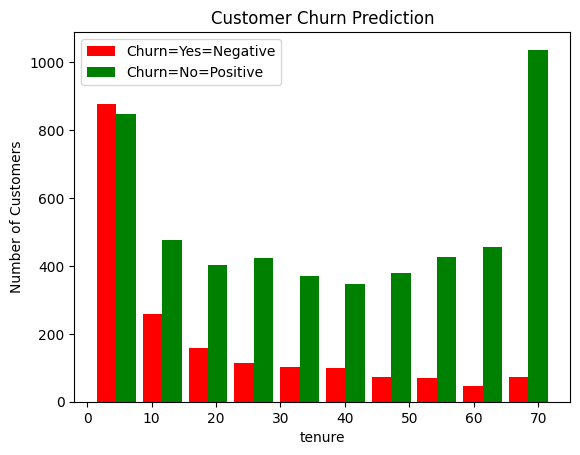

In [85]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.85, color=['red', 'green'],
         label=['Churn=Yes=Negative', 'Churn=No=Positive'])

plt.legend()

**Customers with longer tenure are less likely to leave the company**

**New customers(short tenure) have a higher churn rate**

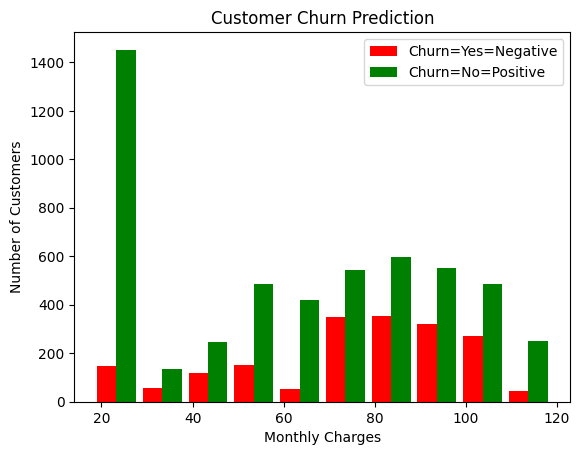

In [86]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.85, color=['red', 'green'],
         label=['Churn=Yes=Negative', 'Churn=No=Positive'])

plt.legend()

**It is seen that, lower monthly charge attract customers and less likely to leave the company**

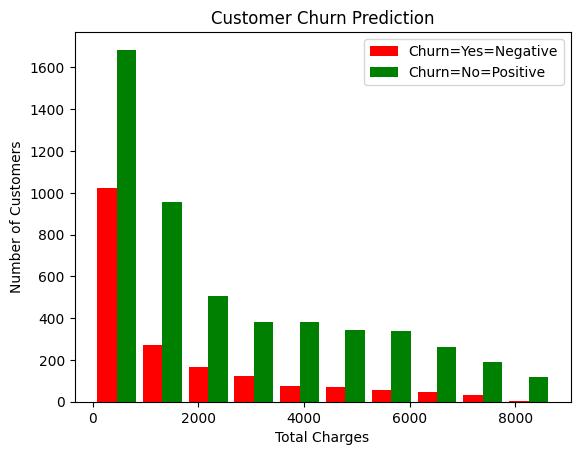

In [87]:
tc_churn_no = df1[df1.Churn=='No'].TotalCharges
tc_churn_yes = df1[df1.Churn=='Yes'].TotalCharges

plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')
plt.hist([tc_churn_yes, tc_churn_no], rwidth=0.85, color=['red', 'green'],
         label=['Churn=Yes=Negative', 'Churn=No=Positive'])
plt.legend()

**Lower total cost has more churn and not churn also may be beacuse of**

- Lower cost may be for less time with the company(new customer)
- Lower cost may be for lower monthly cost

**But in ration of churn and not churn in highest total charge suggests the highest paying customers are less likely to churn(may be they are long term customers)**

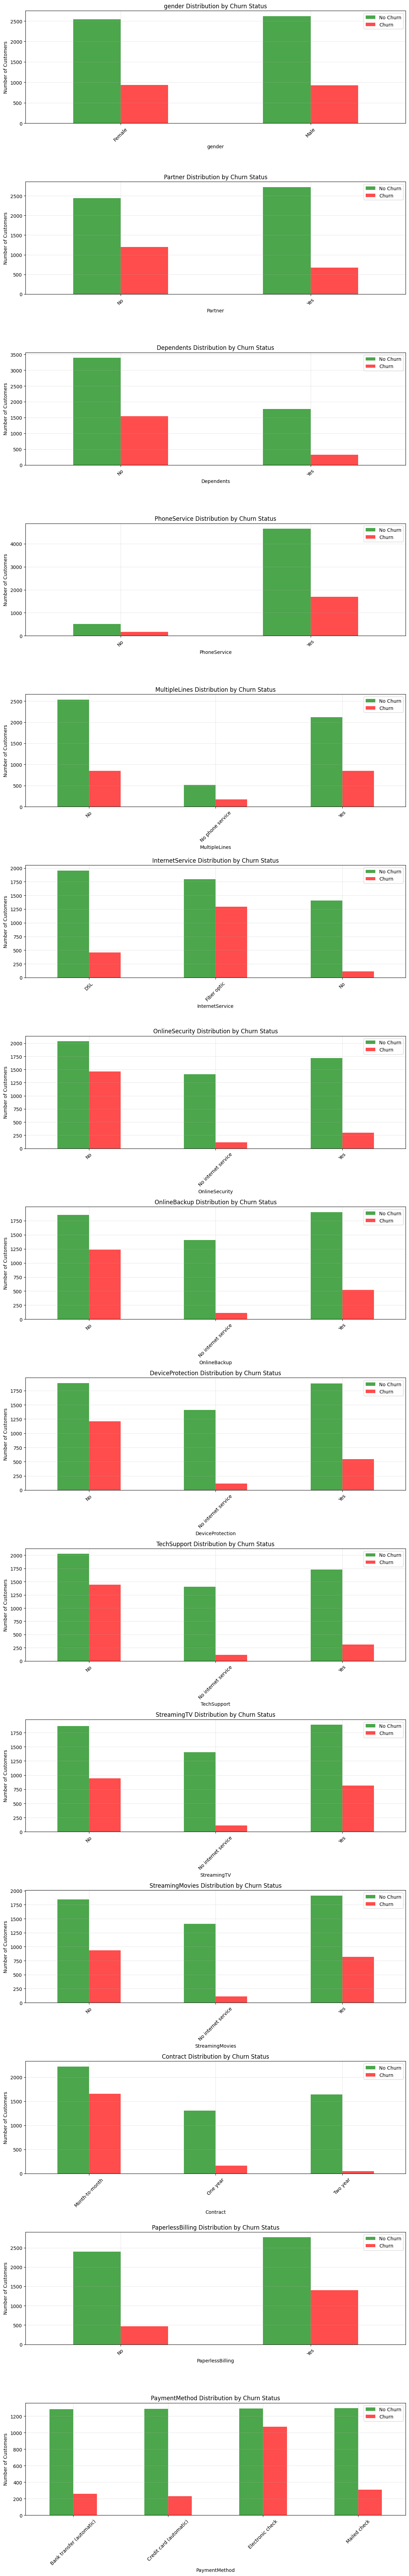

In [88]:
categorical_cols = df1.select_dtypes(include=['object']).columns.tolist()
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

if categorical_cols:
    fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(12, 5*len(categorical_cols)))
    
    # If only one subplot, make it a list for consistency
    if len(categorical_cols) == 1:
        axes = [axes]
    
    for i, col in enumerate(categorical_cols):
        # Create crosstab for categorical analysis
        crosstab = pd.crosstab(df1[col], df1['Churn'])
        
        # Create grouped bar chart
        crosstab.plot(kind='bar', ax=axes[i], color=['green', 'red'], alpha=0.7)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Number of Customers')
        axes[i].set_title(f'{col} Distribution by Churn Status')
        axes[i].legend(['No Churn', 'Churn'])
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

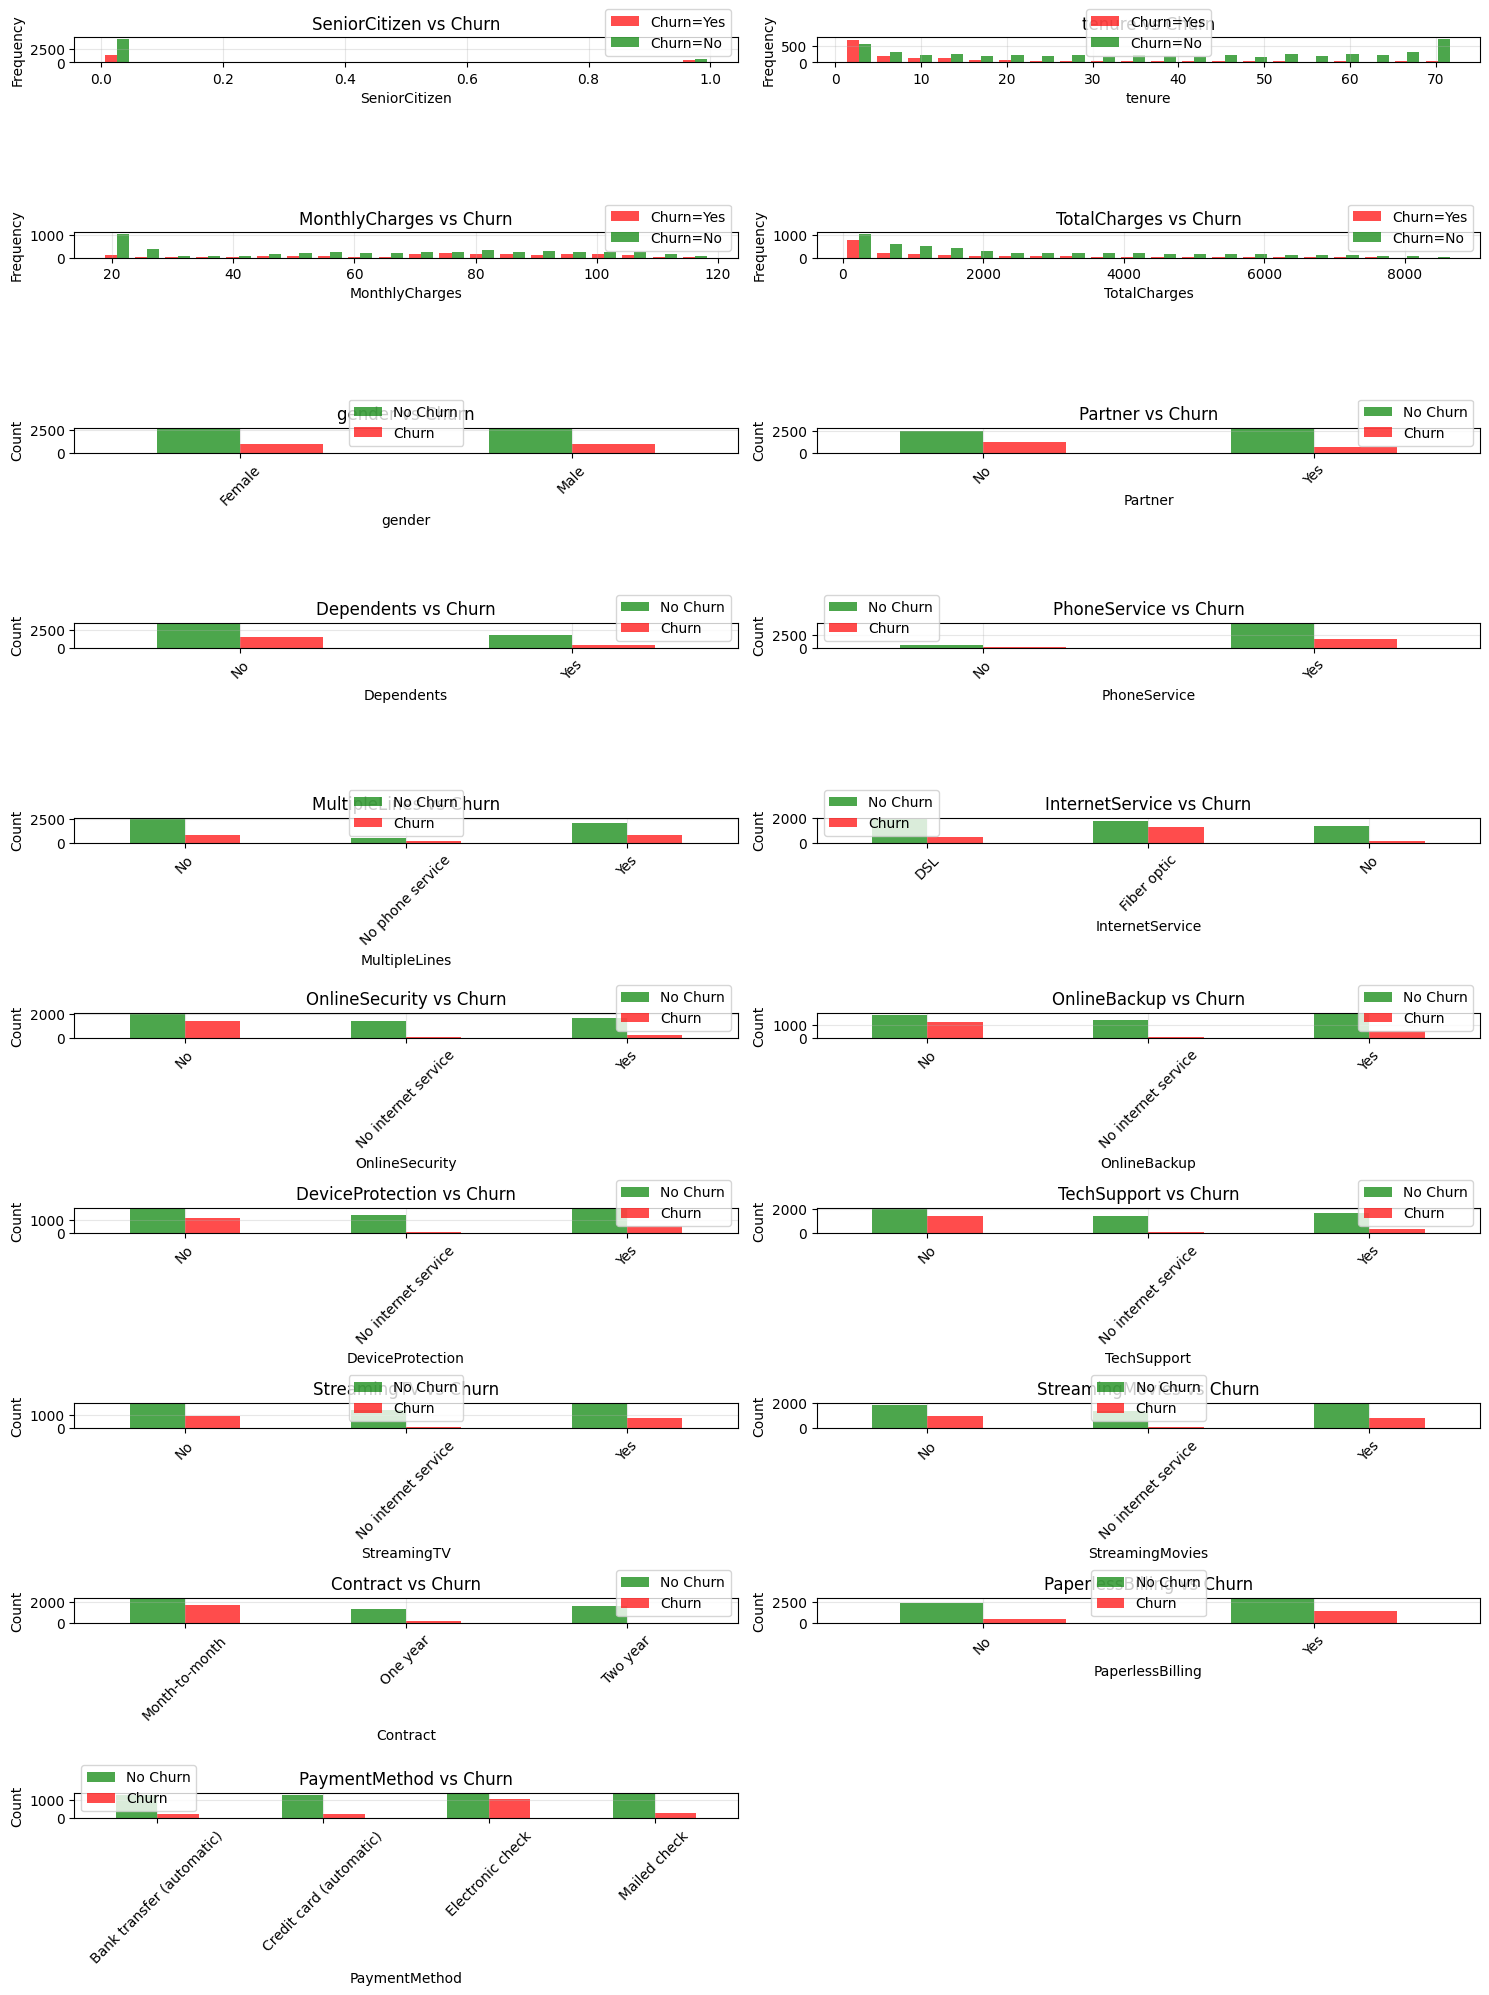

In [89]:
# plot for all columns vs Churn
def plot_all_features_vs_churn(dataframe, target_col='Churn', figsize=(15, 20)):

    numerical_cols = dataframe.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = dataframe.select_dtypes(include=['object']).columns.tolist()
    
    if target_col in numerical_cols:
        numerical_cols.remove(target_col)
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)
    
    total_cols = len(numerical_cols) + len(categorical_cols)
    
    if total_cols == 0:
        print("No features to plot!")
        return
    
    ncols = 2
    nrows = (total_cols + 1) // 2
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten() if total_cols > 1 else [axes]
    
    plot_idx = 0
    
    for col in numerical_cols:
        churn_no = dataframe[dataframe[target_col]=='No'][col]
        churn_yes = dataframe[dataframe[target_col]=='Yes'][col]
        
        axes[plot_idx].hist([churn_yes, churn_no], 
                           bins=20, 
                           alpha=0.7, 
                           color=['red', 'green'],
                           label=['Churn=Yes', 'Churn=No'])
        
        axes[plot_idx].set_xlabel(col)
        axes[plot_idx].set_ylabel('Frequency')
        axes[plot_idx].set_title(f'{col} vs {target_col}')
        axes[plot_idx].legend()
        axes[plot_idx].grid(True, alpha=0.3)
        plot_idx += 1
    
    for col in categorical_cols:
        crosstab = pd.crosstab(dataframe[col], dataframe[target_col])
        crosstab.plot(kind='bar', ax=axes[plot_idx], color=['green', 'red'], alpha=0.7)
        
        axes[plot_idx].set_xlabel(col)
        axes[plot_idx].set_ylabel('Count')
        axes[plot_idx].set_title(f'{col} vs {target_col}')
        axes[plot_idx].legend(['No Churn', 'Churn'])
        axes[plot_idx].tick_params(axis='x', rotation=45)
        axes[plot_idx].grid(True, alpha=0.3)
        plot_idx += 1
    
    for i in range(plot_idx, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

plot_all_features_vs_churn(df1)